# Short term investment

## Bolinger Band

이동 평균 + 변동성

![picture 1](images/749f43c907dd3bb5162a3696e24dabb03229142e55c25ae9de2b88d6b75683a3.png)  

+- 격차는 Z-Score 사용

![picture 2](images/a778887c73b60f692bda25efa18525b0873f860b9e83f0b3f4ac114966154170.png)  



In [1]:
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime
import json
sys.path.append('method.py')


from method import *

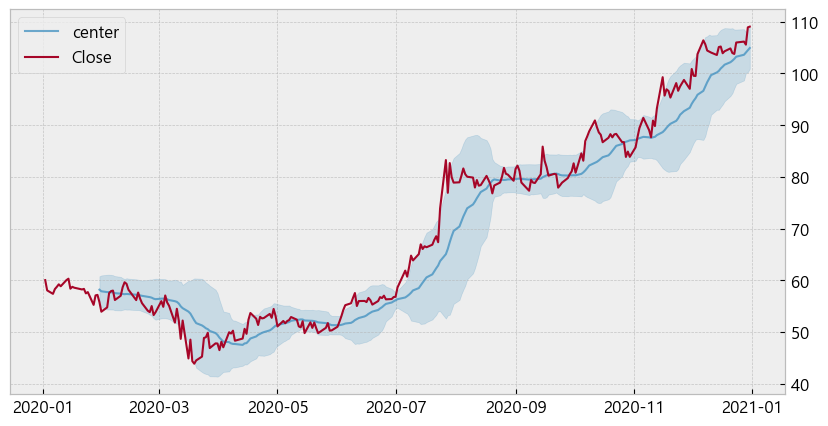

In [2]:

import finterstellar as fs

tsm = fs.get_price('TSM', '2020-01-01', end_date='2020-12-31')
tsm['Close'] = tsm['TSM']
tsm_boll = get_trend_of_bollinger(tsm, 20, 2)
draw_band_chart(tsm_boll)

CAGR: 9.12%
Accumulated return: 8.40%
Average return: 0.86%
Benchmark return : 95.41%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 0.9yrs
Sharpe ratio: 0.32
MDD: -13.76%
Benchmark MDD: -27.24%






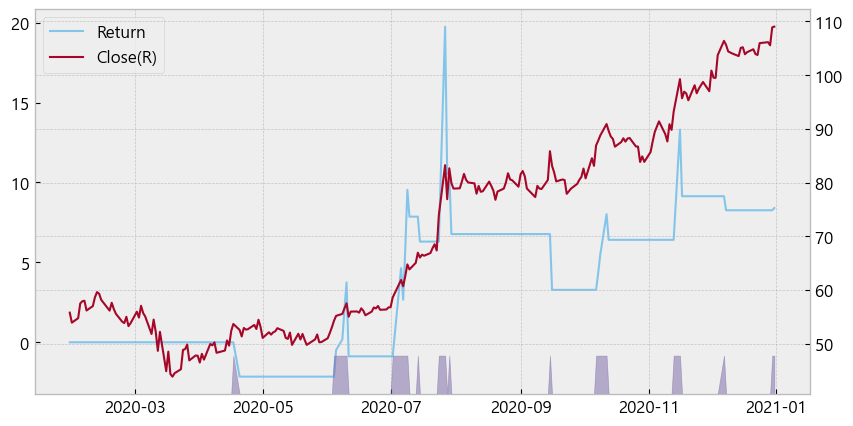

In [3]:
add_band_to_signal(tsm_boll, 'Close', 'A', 'B')
add_position_df(tsm_boll)
tsm_boll_ret ,_ = get_evaluate_column(tsm_boll)
draw_trade_results(tsm_boll_ret)

CAGR: 15.37%
Accumulated return: 14.15%
Average return: 4.53%
Benchmark return : 95.41%
Number of trades: 3
Number of win: 3
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -15.97%
Benchmark MDD: -27.24%






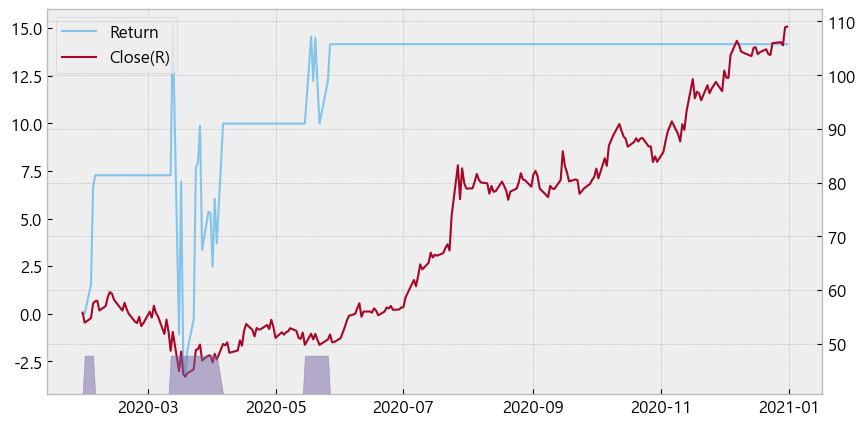

In [4]:

add_band_to_signal(tsm_boll, 'Close', 'D', 'B')
add_position_df(tsm_boll)
tsm_boll_ret, _ = get_evaluate_column(tsm_boll)
draw_trade_results(tsm_boll_ret)

## 최적 해 찾아보기

0.1 {'CAGR': 85.95, 'Accumulated': 79.12, 'Average': 12.97, 'Benchmark': 95.41, 'Trade': 5, 'Win': 2, 'Hit ratio': 0.4, 'Investment period': 336, 'Sharpe': 1.586, 'MDD': -26.4, 'Benchmark MDD': -27.24}


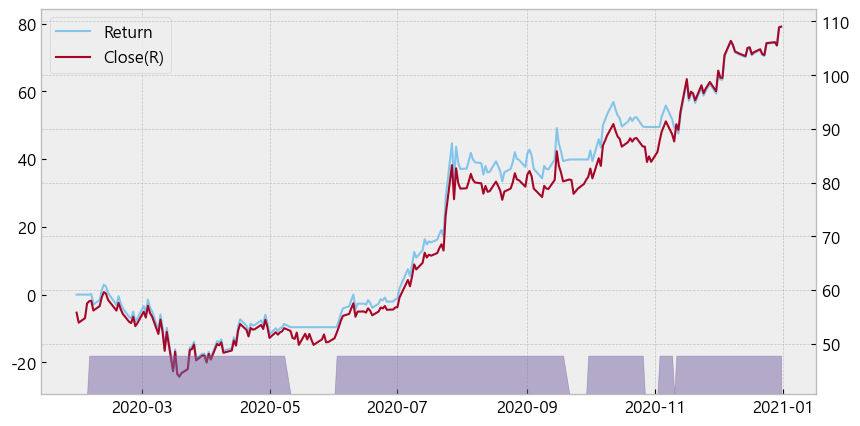

In [5]:
ret ={}
ret['CAGR'] = -987654321
my_range = np.arange(0.1, 3, 0.1)
for i in my_range:
 tsm_boll = get_trend_of_bollinger(tsm, 20, i)
 add_band_to_signal(tsm_boll, 'Close', 'A', 'B')
 add_position_df(tsm_boll)
 tsm_boll_ret, tmp_ret = get_evaluate_column(tsm_boll, isPrint=False)
 if tmp_ret['CAGR'] > ret['CAGR']:
  ret = tmp_ret
  print(f"{i} {ret}")
  draw_trade_results(tsm_boll_ret)



0.1 {'CAGR': 69.31, 'Accumulated': 63.8, 'Average': 12.55, 'Benchmark': 95.41, 'Trade': 5, 'Win': 4, 'Hit ratio': 0.8, 'Investment period': 336, 'Sharpe': 1.311, 'MDD': -26.4, 'Benchmark MDD': -27.24}
0.2 {'CAGR': 73.68, 'Accumulated': 67.83, 'Average': 10.89, 'Benchmark': 95.41, 'Trade': 6, 'Win': 5, 'Hit ratio': 0.833, 'Investment period': 336, 'Sharpe': 1.407, 'MDD': -26.4, 'Benchmark MDD': -27.24}
0.5 {'CAGR': 81.42, 'Accumulated': 74.95, 'Average': 6.83, 'Benchmark': 95.41, 'Trade': 10, 'Win': 9, 'Hit ratio': 0.9, 'Investment period': 336, 'Sharpe': 1.647, 'MDD': -21.05, 'Benchmark MDD': -27.24}


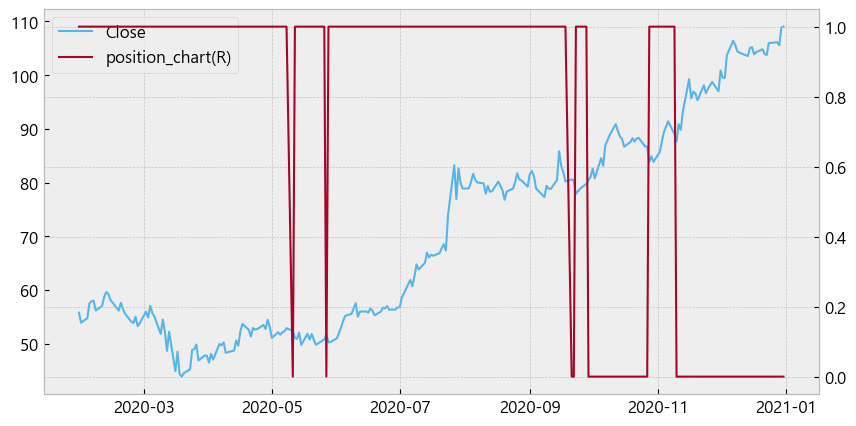

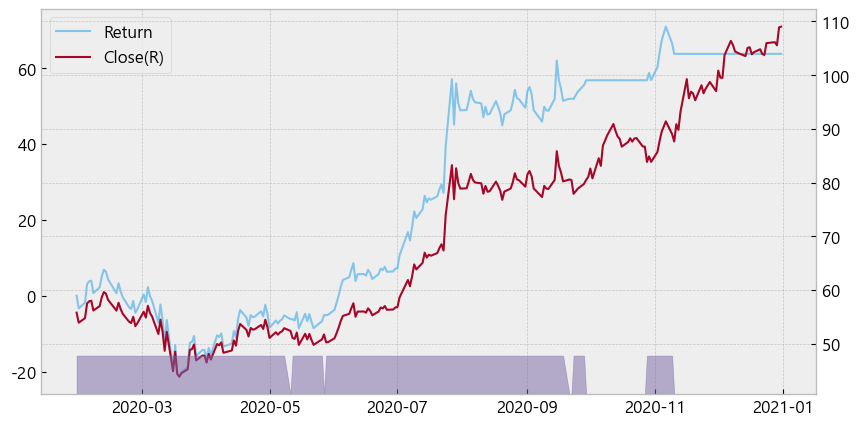

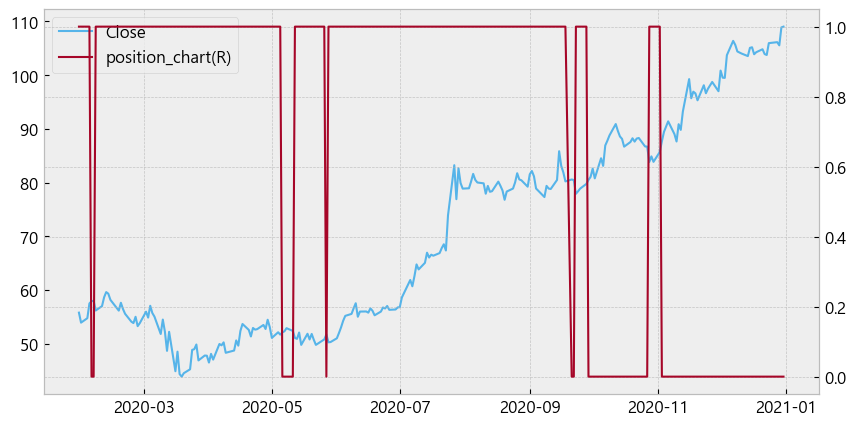

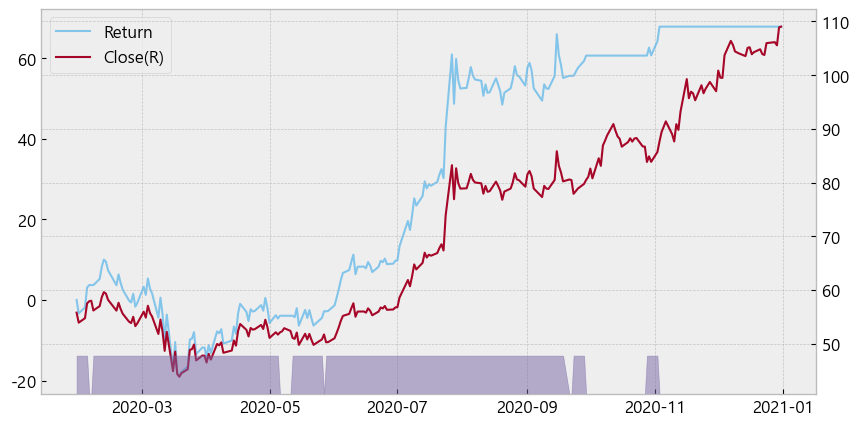

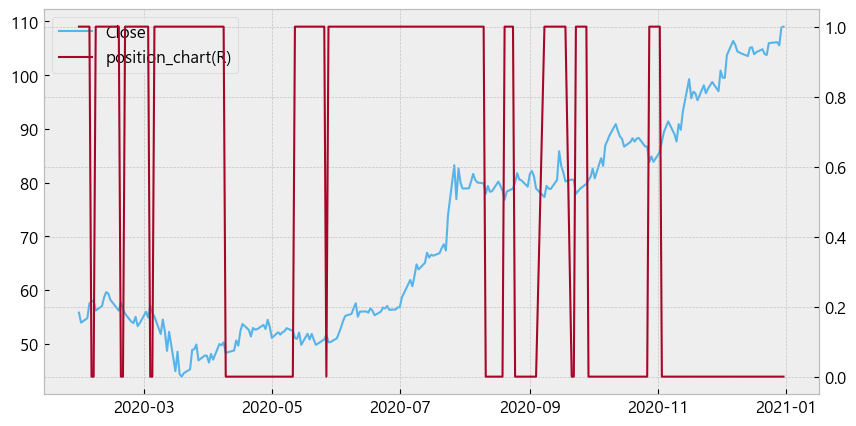

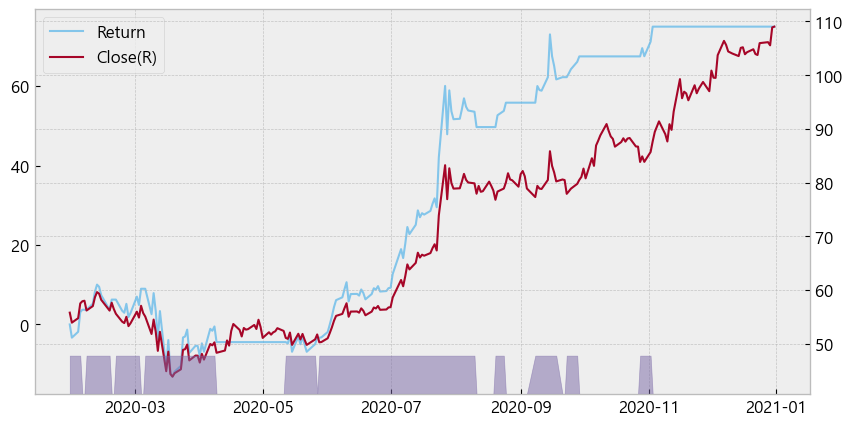

In [10]:

ret ={}
ret['CAGR'] = -987654321

for i in my_range:
 tsm_boll = get_trend_of_bollinger(tsm, 20, i)
 add_band_to_signal(tsm_boll, 'Close', 'D', 'B')
 add_position_df(tsm_boll)
 tsm_boll_ret, tmp_ret = get_evaluate_column(tsm_boll, isPrint=False)
 if tmp_ret['CAGR'] > ret['CAGR']:
  ret = tmp_ret
  print(f"{i} {ret}")
  draw_chart(tsm_boll_ret, left = 'Close', right ='position_chart')
  draw_trade_results(tsm_boll_ret)


## 평균 회귀 와 모멘텀 투자 결합

In [7]:
tsm_boll = get_trend_of_bollinger(tsm, w=20, k =1)

tsm_boll['ab']= add_band_to_signal(tsm_boll,'Close','A', 'B')
tsm_boll['db']= add_band_to_signal(tsm_boll,'Close','D', 'B')

CAGR: 4.36%
Accumulated return: 4.01%
Average return: 4.01%
Benchmark return : 95.41%
Number of trades: 1
Number of win: 1
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.78
MDD: -0.73%
Benchmark MDD: -27.24%




CAGR: 52.29%
Accumulated return: 48.14%
Average return: 1.69%
Benchmark return : 95.41%
Number of trades: 28
Number of win: 12
Hit ratio: 42.86%
Investment period: 0.9yrs
Sharpe ratio: 1.03
MDD: -20.23%
Benchmark MDD: -27.24%






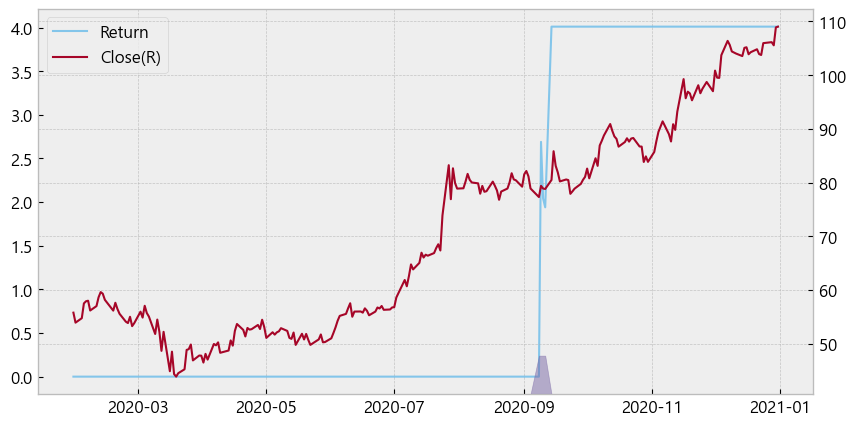

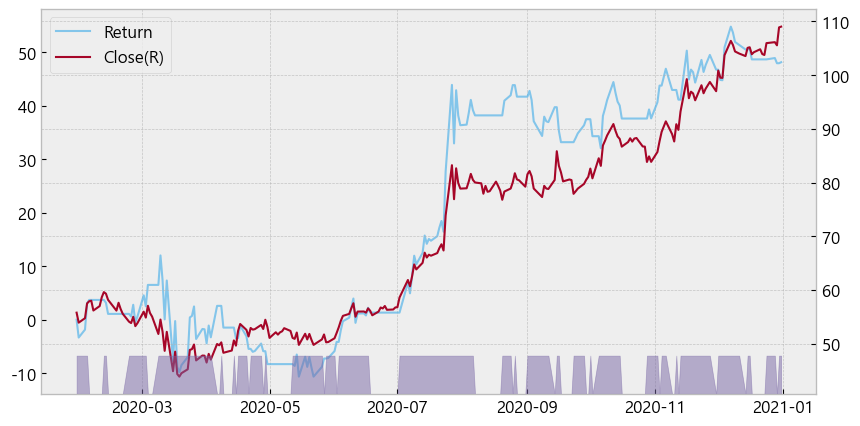

In [8]:


tsm_boll_add = add_combine_signal_and(tsm_boll.copy(), ['ab', 'db'])
tsm_boll_or = add_combine_signal_or(tsm_boll.copy(), ['ab', 'db'])

add_position_df(tsm_boll_add)
add_position_df(tsm_boll_or)

tsm_boll_add_result, _= get_evaluate_column(tsm_boll_add)
tsm_boll_or_result, _ = get_evaluate_column(tsm_boll_or)


draw_trade_results(tsm_boll_add_result)
draw_trade_results(tsm_boll_or_result)

In [9]:
and_result ={}
or_result={}

and_result['CAGR'] = -987654321
or_result['CAGR'] = -987654321
for i in my_range:
  tsm_boll = get_trend_of_bollinger(tsm, w=20, k =i)

  tsm_boll['ab']= add_band_to_signal(tsm_boll,'Close','A', 'B')
  tsm_boll['db']= add_band_to_signal(tsm_boll,'Close','D', 'B')
  tsm_boll_add = add_combine_signal_and(tsm_boll.copy(), ['ab', 'db'])
  tsm_boll_or = add_combine_signal_or(tsm_boll.copy(), ['ab', 'db'])

  add_position_df(tsm_boll_add)
  add_position_df(tsm_boll_or)

  tsm_boll_add_result, tmp_and_result= get_evaluate_column(tsm_boll_add,isPrint=False)
  tsm_boll_or_result, tmp_or_result = get_evaluate_column(tsm_boll_or, isPrint=False)

  if(tmp_and_result['CAGR'] > and_result['CAGR']):
    and_result = tmp_and_result
    print(f'and {i} : {tmp_and_result}')

  if(tmp_or_result['CAGR'] > or_result['CAGR']):
    or_result = tmp_or_result
    print(f'or {i} : {tmp_or_result}')


and 0.1 : {'CAGR': 43.15, 'Accumulated': 39.72, 'Average': 15.01, 'Benchmark': 95.41, 'Trade': 3, 'Win': 1, 'Hit ratio': 0.333, 'Investment period': 336, 'Sharpe': 0.838, 'MDD': -26.4, 'Benchmark MDD': -27.24}
or 0.1 : {'CAGR': 119.48, 'Accumulated': 109.99, 'Average': 11.6, 'Benchmark': 95.41, 'Trade': 7, 'Win': 5, 'Hit ratio': 0.714, 'Investment period': 336, 'Sharpe': 2.146, 'MDD': -26.4, 'Benchmark MDD': -27.24}
and 0.2 : {'CAGR': 47.19, 'Accumulated': 43.44, 'Average': 23.73, 'Benchmark': 95.41, 'Trade': 2, 'Win': 1, 'Hit ratio': 0.5, 'Investment period': 336, 'Sharpe': 0.927, 'MDD': -26.4, 'Benchmark MDD': -27.24}
and 0.4 : {'CAGR': 47.23, 'Accumulated': 43.48, 'Average': 11.44, 'Benchmark': 95.41, 'Trade': 4, 'Win': 2, 'Hit ratio': 0.5, 'Investment period': 336, 'Sharpe': 1.416, 'MDD': -9.23, 'Benchmark MDD': -27.24}
and 0.5 : {'CAGR': 51.98, 'Accumulated': 47.85, 'Average': 12.15, 'Benchmark': 95.41, 'Trade': 4, 'Win': 2, 'Hit ratio': 0.5, 'Investment period': 336, 'Sharpe': 1.